## My Capstone Project  - Assignment
* Diamond Price Prediction
* Uses a Kaggle Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/2024/YEAR1/Semester1Year1/SOFTWARETECHNOLOGIES1/ST1_CapstoneProject

/content/drive/MyDrive/2024/YEAR1/Semester1Year1/SOFTWARETECHNOLOGIES1/ST1_CapstoneProject


In [ ]:
!ls

diamonds.csv


## This Project is based on Diamond Price Prediction data availible from Kaggle repository(https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction).

* It containts the details of 53940 diamonds.
* My project task is to create a machine learning model which can predict the average price of a diamond based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorithm for example) availible from different Python packages, modules and classes.

## Step 1: Reading the data Reading the data with Python

In [ ]:
# Suppressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np

#test
DiamondData = pd.read_csv('/content/drive/MyDrive/2024/YEAR1/Semester1Year1/SOFTWARETECHNOLOGIES1/ST1_CapstoneProject/diamonds.csv', encoding = 'latin')
DiamondData = DiamondData.drop(columns = ['Unnamed: 0'])
print('Shape before deleting duplicate values:', DiamondData.shape)

#Removing duplicate rows if any
DiamondData = DiamondData.drop_duplicates()
print('Shape after deleting duplicate values:', DiamondData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DiamondData.head(10)

Shape before deleting duplicate values: (53940, 10)
Shape after deleting duplicate values: (53794, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# Key observations from Step 1 about Data Description
* This file contains 53940 Diamond details.
* There are 9 attributes and they are outlined below.
* carat - Carat weight of the diamond.
* cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal.
* color - Color of the diamond, with D being the best and J the worst.
* clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3 = level 3 inclusions) FL IF VVS1.
* depth - depth % :The height of a diamond, measured from the cutlet to the table, divided by its average girdle diameter.
* table - table%: The width of the diamond's table expressed as a percentage of its average diameter.
* price - The price of the diamond.
* x - Length mm.
* y - Width mm.


## Step 2: Problem Statement Definition
* Creating a prediction model to predict the price( price ) of a diamond
* Target Variable: Price Predictors/Features: carat, cut, color, clarity, depth, table, price, x, y.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.

## Step 4: Looking at the class Distribution(Target variable distribution to check if the data is balanced or skewed.)

* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

<Axes: >

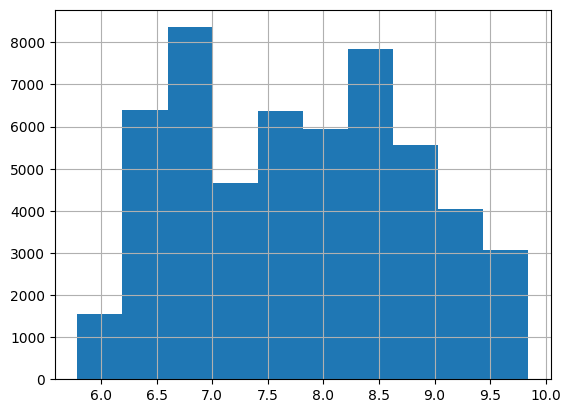

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the Price values
DiamondData['price'] = np.log(DiamondData['price'])
DiamondData['price'].hist()


## Observations from Step 4

* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
* There are four commands which are used for Basic data exploratory Analysis in Python
* head(): This helps to see a few sample rows of the data
* info(): This provides the summarized information of the data
* describe(): This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [ ]:
# Looking at sample rows in the data
DiamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,5.814131,4.34,4.35,2.75


In [ ]:
#Looking at sample rows in the data
DiamondData.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,7.921898,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,7.921898,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,7.921898,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,7.921898,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,7.921898,5.83,5.87,3.64


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
DiamondData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


In [ ]:
# Looking at the descriptive statistics of the data
DiamondData.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79778,NaN,NaN,NaN,61.748080,57.458109,7.787138,5.731214,5.734653,3.538714
std,0.47339,NaN,NaN,NaN,1.429909,2.233679,1.014439,1.120695,1.141209,0.705037
min,0.20000,NaN,NaN,NaN,43.000000,43.000000,5.786897,0.000000,0.000000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,6.857514,4.710000,4.720000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,7.783641,5.700000,5.710000,3.530000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,8.580497,6.540000,6.540000,4.030000


In [ ]:
# Finding unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
DiamondData.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regarding each column.
* Hence, creating an initial roadmap for further analysis.
* The selected columns in this step are not final, further study will be done and then a final list will be created
* carat - Continuous. Selected.
* cut - Qualitative, Categorical. Selected.
* color - Qualitative, Categorical. Selected.
* clarity - Qualitative, Categorical. Selected.
* depth - Continuous. Selected.
* table - Continuous. Selected.
* price - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model.
* x - Continuous. Selected.
* y - Continuous. Selected.
* z - Continuous. Selected.


## Step 7: Removing/Converting Unwanted columns

* There are three qualitative columns in the data.
* - cut
* - color
* - clarity
* Hence we need to convert these columns into ordinal data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

DiamondData['cut'] = label_encoder.fit_transform(DiamondData['cut'])
DiamondData['color'] = label_encoder.fit_transform(DiamondData['color'])
DiamondData['clarity'] = label_encoder.fit_transform(DiamondData['clarity'])

# Display the DataFrame with ordinal values
print(DiamondData)


       carat  cut  color  clarity  depth  table     price     x     y     z
0       0.23    2      1        3   61.5   55.0  5.786897  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  5.786897  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  5.789960  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  5.811141  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  5.814131  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...       ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  7.921898  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  7.921898  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  7.921898  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  7.921898  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  7.921898  5.83  5.87  3.64

[53794 rows x 10 columns]


## Step 8: Visual Exploratory Data Analysis

* Visualize distribution of all the Categorical predictor variables in the data using bar plots.
* We can spot a categorical variable in the data by looking at the unique valiues in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repitition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step, I spotted three categorical predictors in the data.
* Categorical Predictors:
* 'cut',
* 'color',
* 'clarity'
* We will use bar charts to see how the data is distributed for these categorical columns.

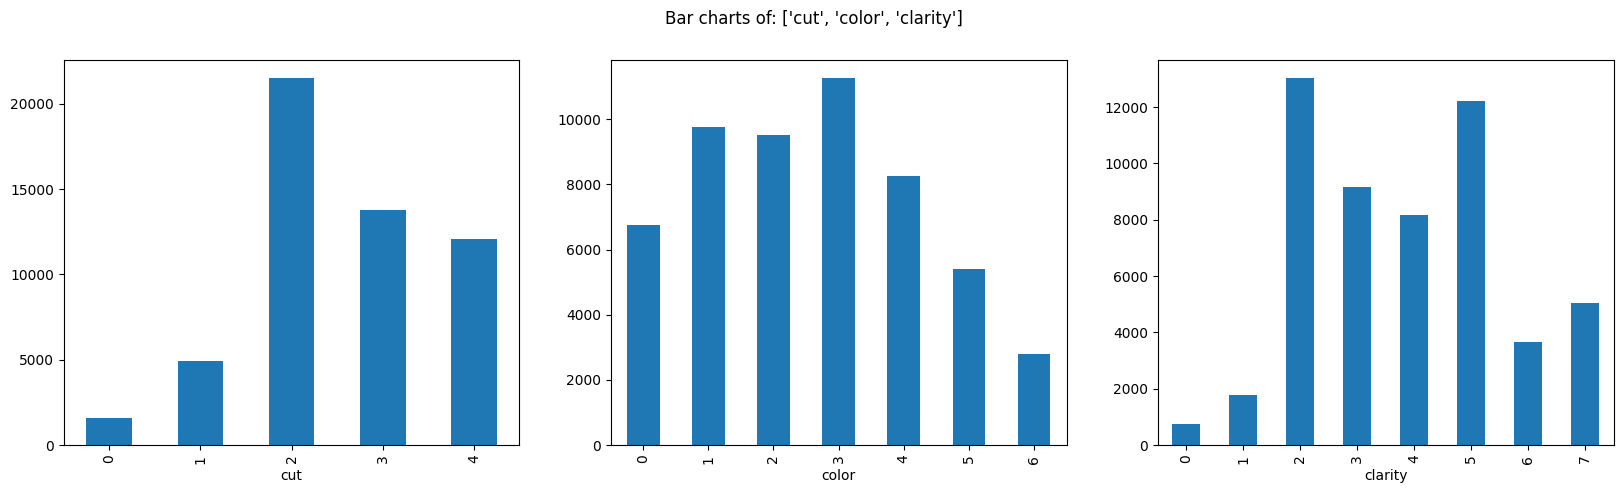

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# We are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt

  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

#########################################################################
#Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=DiamondData, colsToPlot=['cut', 'color', 'clarity'])

## Observations from Step 8 - Visual Exploratory Data Analysis

* Bar Charts have allowed interpretation on the three data columns.
The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* In the ideal bar chart each category has comparable frequency.
* Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution when there is only one dominant bar and the other categories are present in very low numbers.
* These kind of columns may not be very helpful in machine learning model development.
* We can confirm this with the correlation analysis step coming up, and take a final call to select or reject the column/data attribute.
* There are enough rows in each data for the ML/AI regression algorithm to learn.
* No Categorical Variables are needed for futher analysis.

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms

* Based on the Basic Exploratory Data Analysis, there are six continuous predictor variables 'carat', 'depth', 'table', 'x', 'y', and 'z'.

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

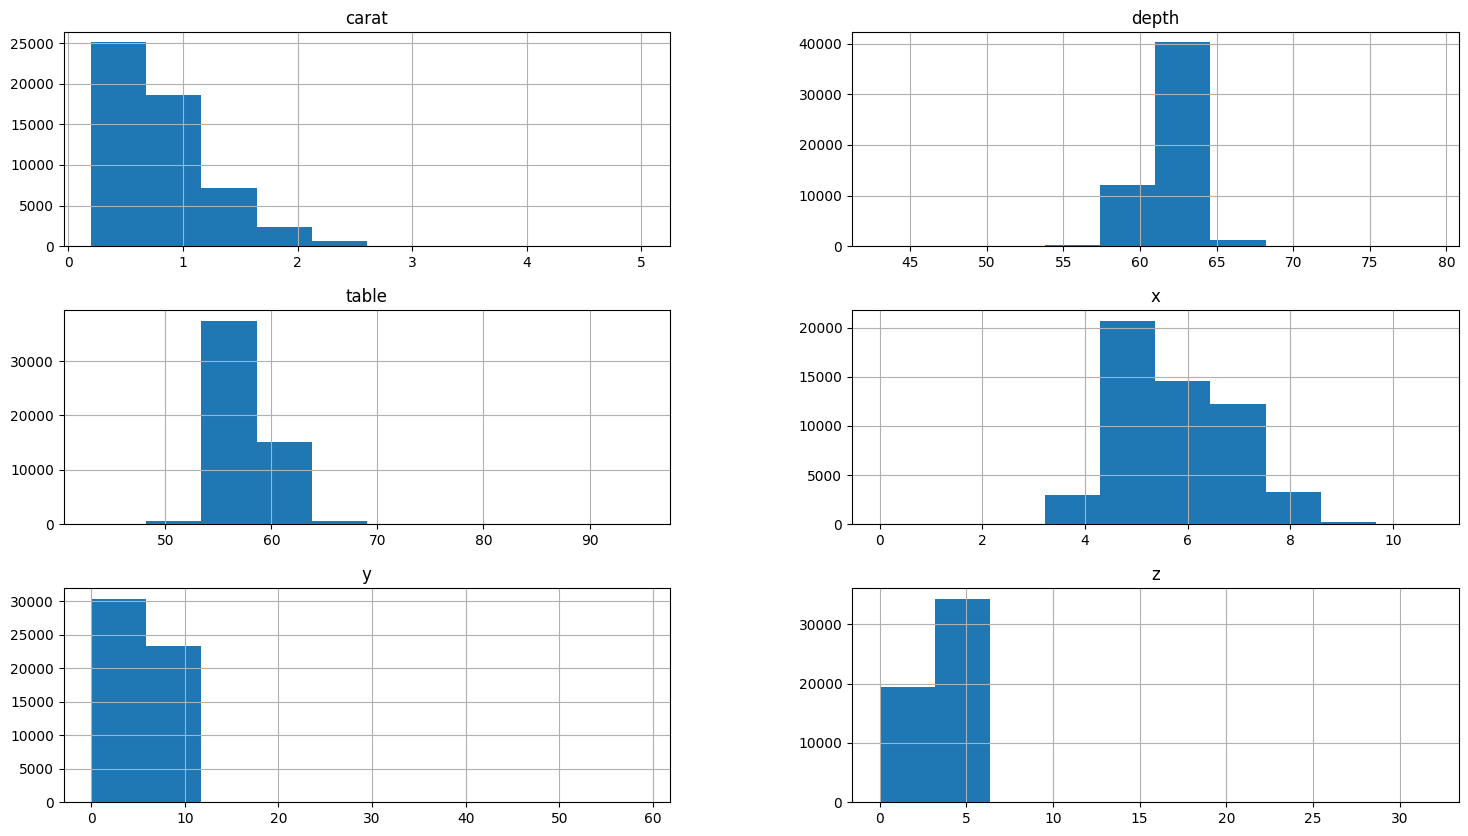

In [ ]:
# Pllotting histograms of multiple columns together
DiamondData.hist(['carat', 'depth', 'table', 'x', 'y', 'z'], figsize=(18,10))

## Obersvations from Step 9

* Histogram Interpretation
* Each histogram shows us the data distribution for a single continuous variable.
* The X-axis shows the range of values and Y-axis represent the number of values in that range.
* If there is too much skewness, then outlier removal treatment should be done and the column should be re-examined, and if that also does not solve the problem then only reject the column/data attribute.
* Selected Continuous Variables:
* carat: Selected. The distribution is good.
* depth: Selected. The distribution is good.
* table: Selected. The distribution is good.
* x: Selected. The distribution is good.
* y: Selected. The distribution is good.
* z: Selected. The distribution is good.

## Step 10: Outlier Analysis

* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.
* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column.
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.
* Option-1: Delete the outlier Records. Only if there are just a few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out the most logical value to be replaced in place of outliers by looking at the histogram.
* NO OUTLIERS FOUND.

## Step 11: Visualising Data Distribution after outlier removal

* NO OUTLIERS FOUND

## Observation from Step 11

* NO OUTLIERS FOUND

## Step 12: Missing Values Analysis

* Missing values are treated for each column seperately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records.
* Impute the missing values with mode value for categorical variables.
* Interpolate the values based on nearby values.
* Interpolate the values based on business logic.

In [ ]:
# Finding how many missing values are there for each column

DiamondData.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Observations from Step 12: Missing Value Analysis

* No missing values in this data.
* So no removal of any data samples(rows) is needed.

## Step 13: Feature Selection (Attribute Selection)

* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.
* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
* **Visual exploration of relationship between variables**
* Continuous Vs Continuous - Scatter Plot
* Categorical Vs Continuous - Box Plot
* Categorical Vs Categorical - Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous - Correlation matrix
* Categorical Vs Continuous - ANOVA test
* Categorical Vs Categorical - Chi-Square test
* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous - Scatter Charts

* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

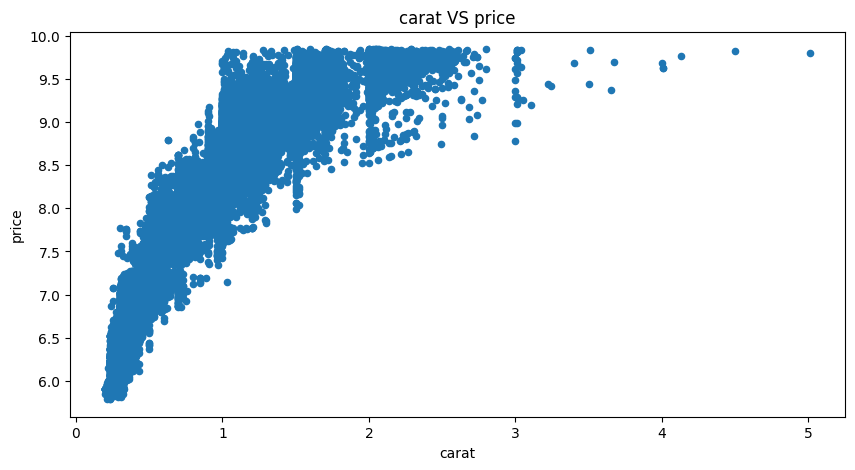

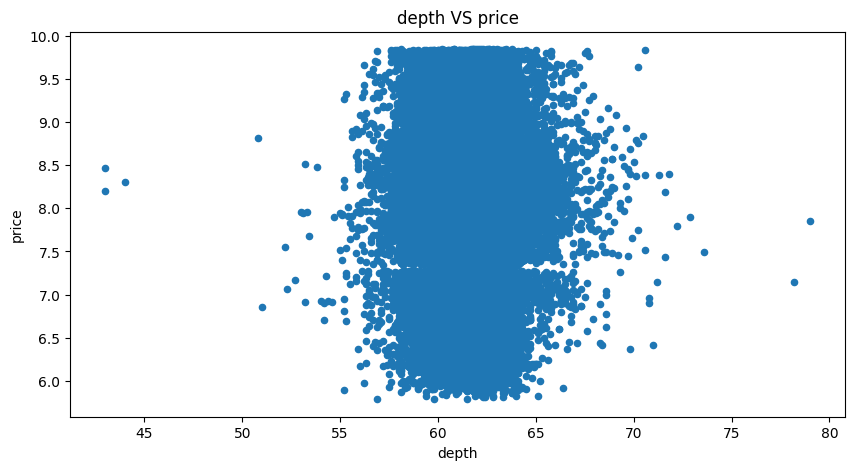

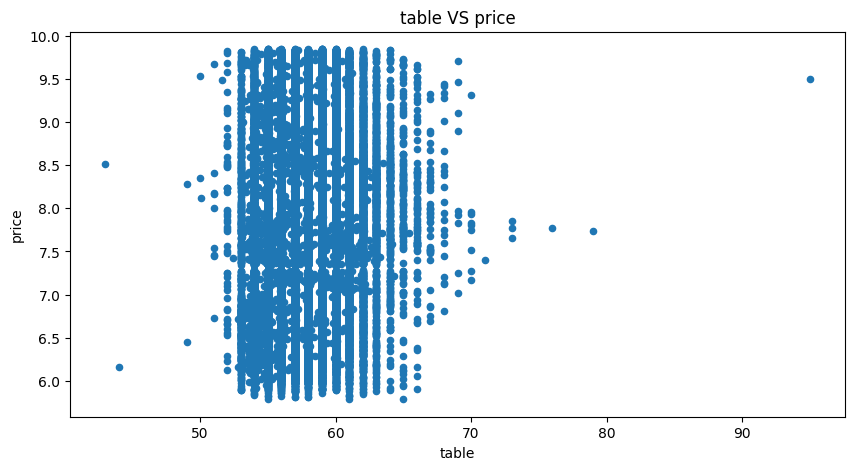

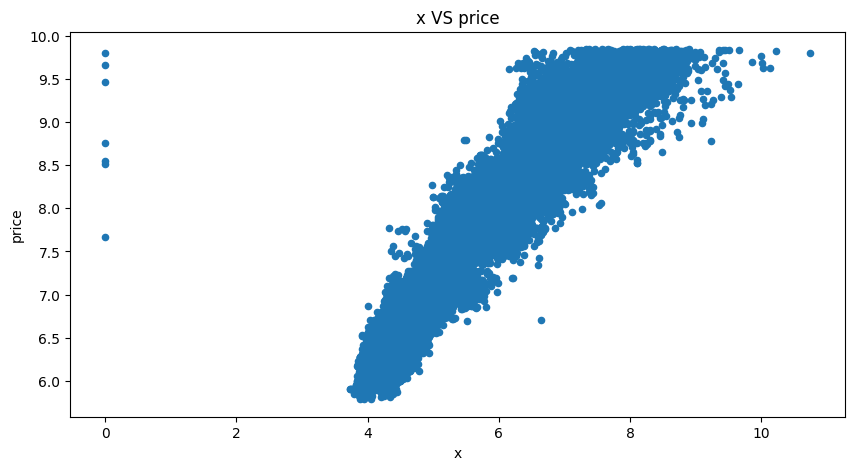

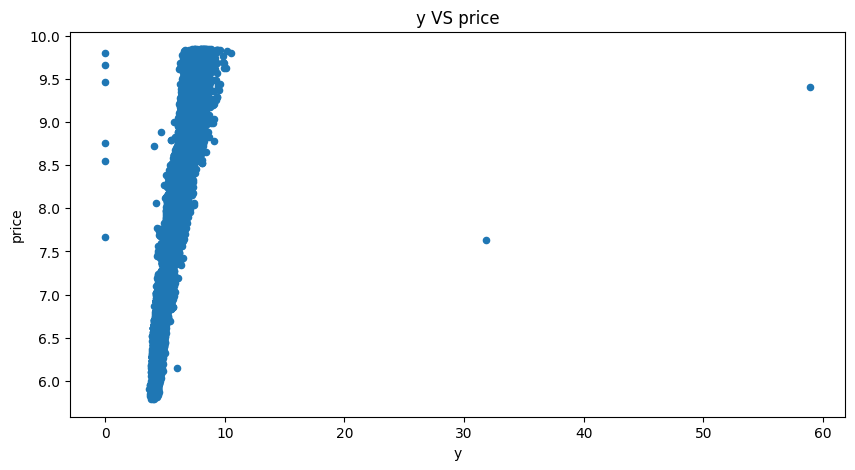

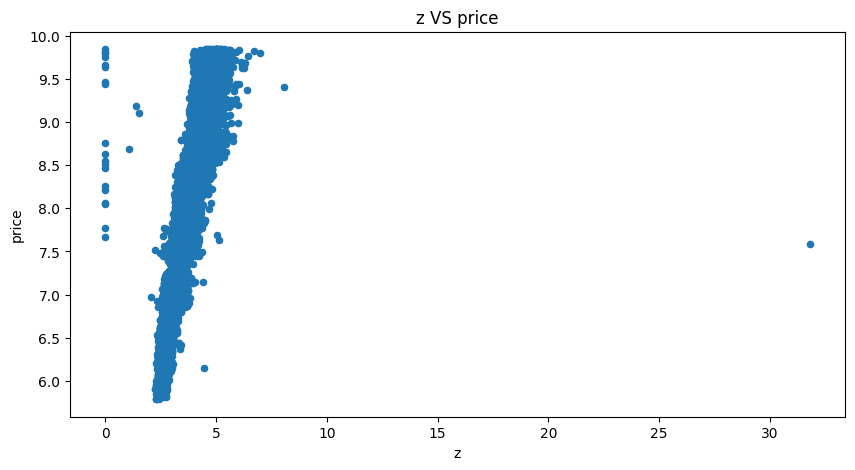

In [ ]:
ContinuousCols=['carat', 'depth', 'table', 'x', 'y', 'z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  DiamondData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS " + 'price')

## Scatter charts interpretation

* carat - Increasing Trend.
* depth - No Trend.
* table - No Trend.
* x - Increasing Trend.
* y - Increasing Trend.
* z - Increasing Trend.

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
It can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator).
* This value can be calculated only between two numberic columns Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend.
* Correlation between (0,1] meand directly proportional, the scatter plot will show a upward trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter.
* We observe the correlations between Target variable and all other predictor variable(s) to check which columns/features/predictors are actually related to the target variable in question.

In [ ]:
# Calculating correlation matrix
ContinuousCols=['price','carat', 'depth', 'table', 'x', 'y', 'z']

# Creating the correlation matrix
CorrelationData=DiamondData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.920370,0.000764,0.157513,0.958254,0.936307,0.935398
carat,0.920370,1.000000,0.027861,0.181091,0.975380,0.951908,0.953542
depth,0.000764,0.027861,1.000000,-0.297669,-0.025348,-0.029389,0.094757
table,0.157513,0.181091,-0.297669,1.000000,0.194855,0.183231,0.150270
x,0.958254,0.975380,-0.025348,0.194855,1.000000,0.974592,0.970686
y,0.936307,0.951908,-0.029389,0.183231,0.974592,1.000000,0.951844
z,0.935398,0.953542,0.094757,0.150270,0.970686,0.951844,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# Reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price    1.000000
carat    0.920370
x        0.958254
y        0.936307
z        0.935398
Name: price, dtype: float64

## Observations from Step 14

* Final selected Continuous columns:
* '**carat**', '**x**', '**y**', '**z**'

## Step 15: Relationship exploration: Categorical Vs Continuous - Box Plots

* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
* Measure the strength or relation using Anova test.

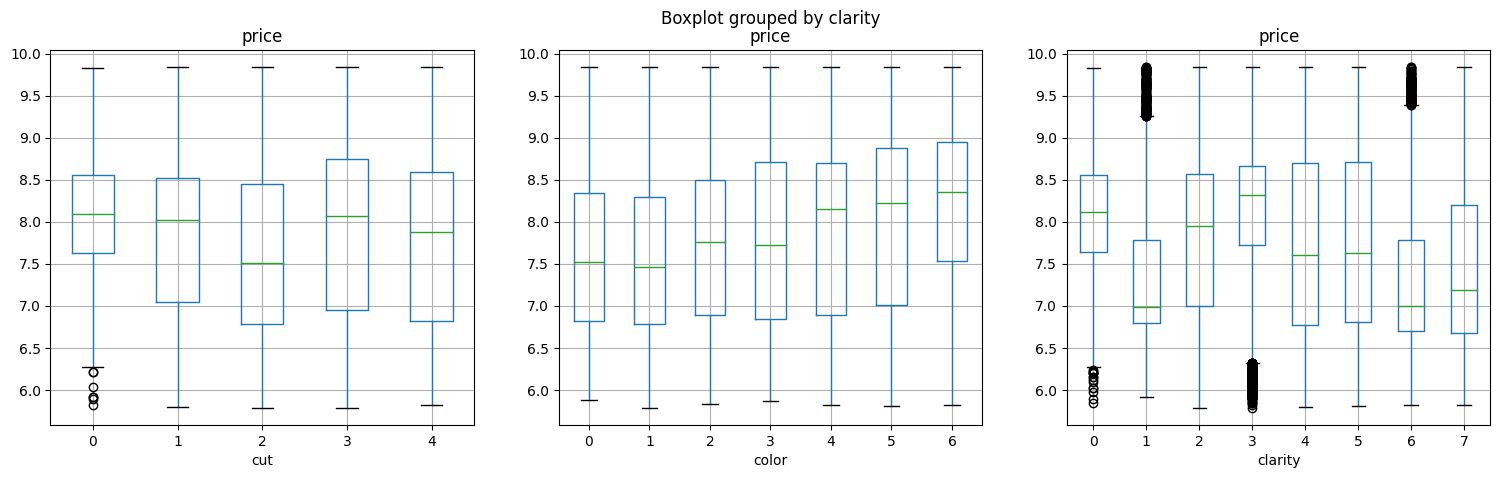

In [ ]:
# Box plots for continuous Target Variable "price" and Categorical predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  DiamondData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Observations from Step 15: Box-Plots interpretation

* For this data, all three categorical predictors look correlated with the Target variable
* We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0) Null Hypotheses: There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true)

In [ ]:



# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

  return(SelectedPredictors)


#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData = DiamondData,
              TargetVariable='price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 1.1832426151972313e-208
color is correlated with price | P-Value: 1.8695142124283026e-298
clarity is correlated with price | P-Value: 0.0


['cut', 'color', 'clarity']

## Observations from Step 16

* The results of ANOVA confirm our visual analysis using box plots above.
* All categorical variables are correlated with the Target variable.
* This is something you can guess by looking at the box plots.
* Final selected Categorical columns: 'cut', 'color', 'clarity'

## Selecting final Predictors/Features for building Machine Learning/AI model.

* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* '**carat**', '**x**', '**y**', '**z**', '**cut**', '**color**', '**clarity**'

In [ ]:
SelectedColumns=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

# Selecting final columns
DataForML=DiamondData[SelectedColumns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,2,1,3
1,0.21,3.89,3.84,2.31,3,1,2
2,0.23,4.05,4.07,2.31,1,1,4
3,0.29,4.20,4.23,2.63,3,5,5
4,0.31,4.34,4.35,2.75,1,6,3


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or model Development

* List of steps that needs to be performed on predictor variables before data can be used for machine learning.
* Converting each Ordinal Categorical columns to numeric.
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies().
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks.
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data.

## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']= DiamondData['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,2,1,3,5.786897
1,0.21,3.89,3.84,2.31,3,1,2,5.786897
2,0.23,4.05,4.07,2.31,1,1,4,5.789960
3,0.29,4.20,4.23,2.63,3,5,5,5.811141
4,0.31,4.34,4.35,2.75,1,6,3,5.814131


## Step 18: Machine Learning Model Development:

* Splitting the data into Training and Testing sample
* We don't use the full data for creating the model(training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Testing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [ ]:
from re import X
#Seperate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data

* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with theaccuracy of raw data(Optional Step)
* However, if you are using KNN or Neural networks, then this step becomes necessary.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(37655, 7)
(37655,)
(16139, 7)
(16139,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:

#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70, 'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9460376616362522

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920   
1  0.145530  0.571695  0.104924  0.118239  1.00  0.166667  0.428571  8.184235   
2  0.076923  0.493482  0.090492  0.103774  0.50  0.500000  0.571429  7.523481   
3  0.064449  0.472998  0.086587  0.100000  0.75  0.166667  0.714286  7.371489   
4  0.205821  0.633147  0.115789  0.133333  0.50  0.833333  0.285714  8.646466   

   Predictedprice  
0             8.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
Mean Accuracy on test data: 95.77500076741458
Median Accuracy on test data: 96.24114467670017

Accuracy values for 10-fold Cross Validation:
 [98.03812718 98.07597487 98.02939936 97.45073726 97.46994432 97.52480143
 97.3145605  97.538186   98.27830222 98.19155979]

Final Average Accu

## Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9562415743995073

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920   
1  0.145530  0.571695  0.104924  0.118239  1.00  0.166667  0.428571  8.184235   
2  0.076923  0.493482  0.090492  0.103774  0.50  0.500000  0.571429  7.523481   
3  0.064449  0.472998  0.086587  0.100000  0.75  0.166667  0.714286  7.371489   
4  0.205821  0.633147  0.115789  0.133333  0.50  0.833333  0.285714  8.646466   

   Predictedprice  
0             8.0  
1             8.0  
2             8.0  
3             8.0  
4             9.0  
Mean Accuracy on test data: 95.77518281443366
Median Accuracy on test data: 96.24578989147759

Accuracy values for 10-fold Cross Validation:
 [96.46817084 97.16677683 97.47415589 96.05695052 96.74959607 97.23263902
 96.96338267 95.89354229 96

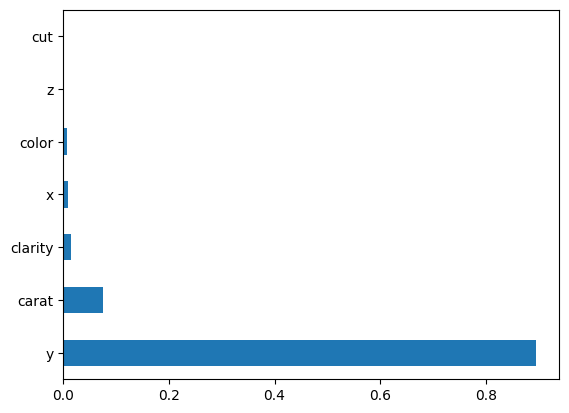

In [ ]:
# Decision Trees(Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


## Plotting/Visualising the Decision Tree

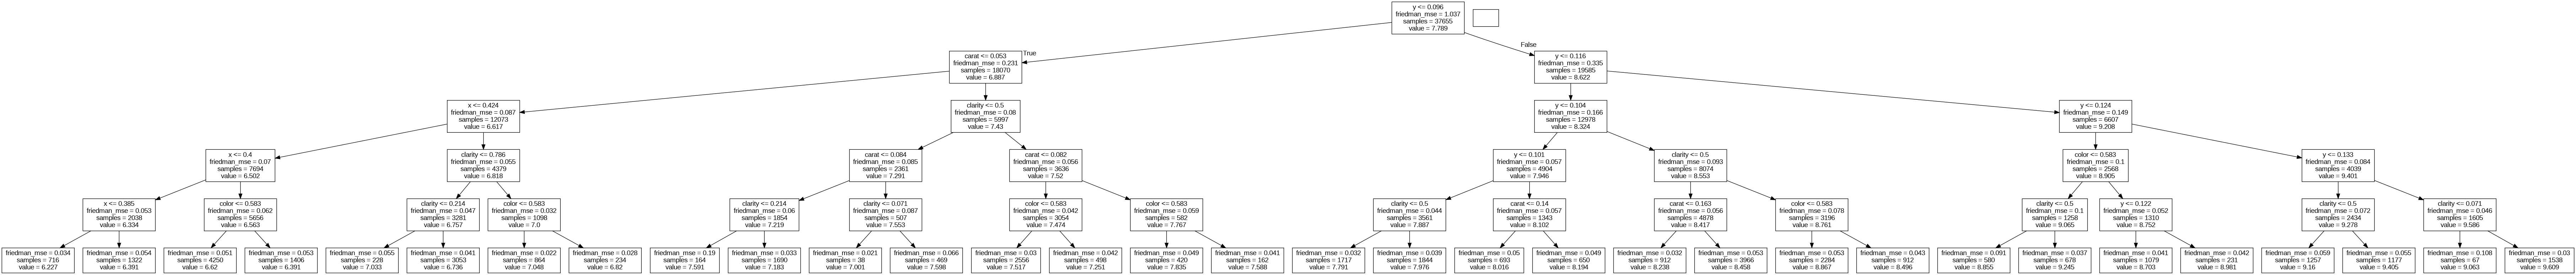

In [ ]:
# Load libraries
from IPython.display import Image
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


## Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9489516561273698

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920   
1  0.145530  0.571695  0.104924  0.118239  1.00  0.166667  0.428571  8.184235   
2  0.076923  0.493482  0.090492  0.103774  0.50  0.500000  0.571429  7.523481   
3  0.064449  0.472998  0.086587  0.100000  0.75  0.166667  0.714286  7.371489   
4  0.205821  0.633147  0.115789  0.133333  0.50  0.833333  0.285714  8.646466   

   Predictedprice  
0             8.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
Mean Accuracy on test data: 95.6973787261353
Median Accuracy on test data: 96.21122717917828

Accuracy values for 10-fold Cross Validation:
 [96.69964    97.30227772 97.62020556 96.09441589 96.52808157 97.31043403
 96.688803

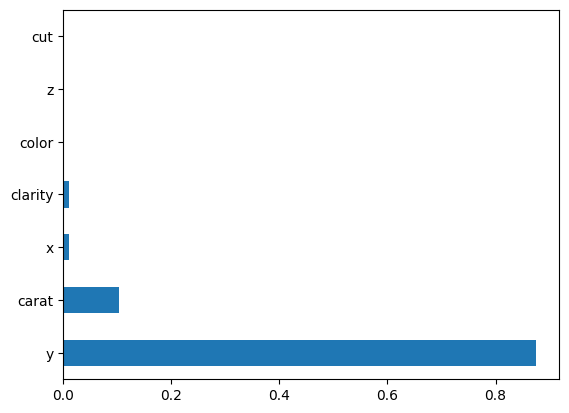

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



## Plotting One of the Decision Tree in Random Forest Regressor

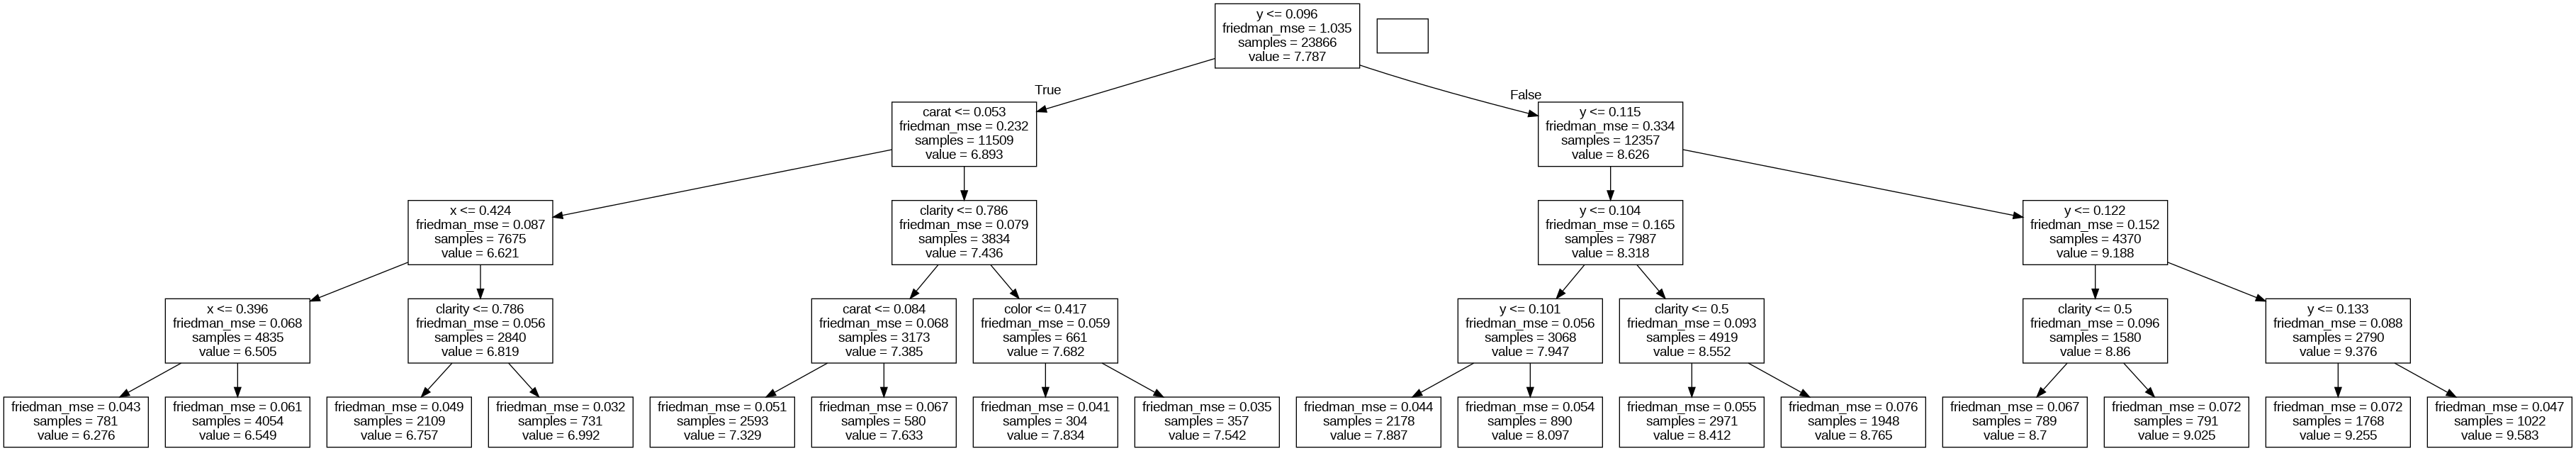

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9365933158805605

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920   
1  0.145530  0.571695  0.104924  0.118239  1.00  0.166667  0.428571  8.184235   
2  0.076923  0.493482  0.090492  0.103774  0.50  0.500000  0.571429  7.523481   
3  0.064449  0.472998  0.086587  0.100000  0.75  0.166667  0.714286  7.371489   
4  0.205821  0.633147  0.115789  0.133333  0.50  0.833333  0.285714  8.646466   

   Predictedprice  
0             8.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
Mean Accuracy on test data: 95.40344944140902
Median Accuracy on test data: 95.81803400055334

Accuracy values for 10-fold Cross Validation:
 [95.95264576 96.51708175 98.04240227

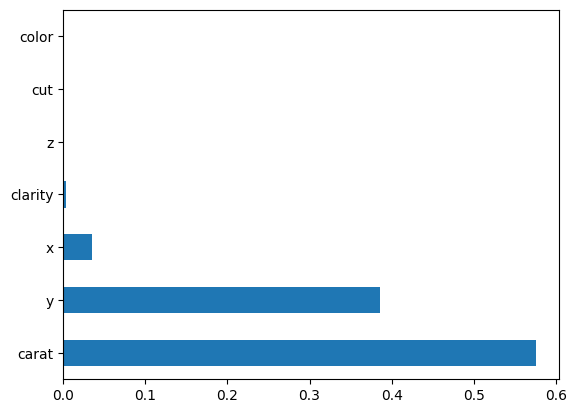

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE

MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9915135869266581

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920

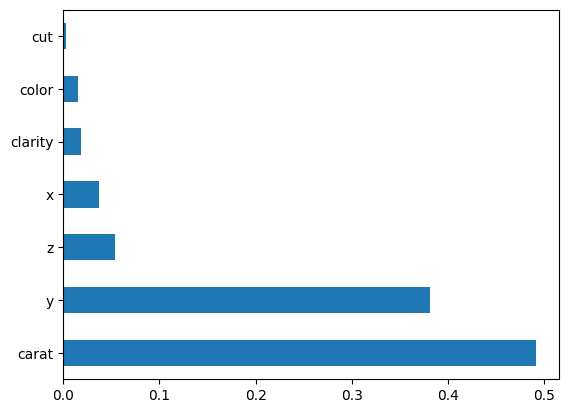

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE

MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting a single Decision tree out of XGBoost

<Axes: >

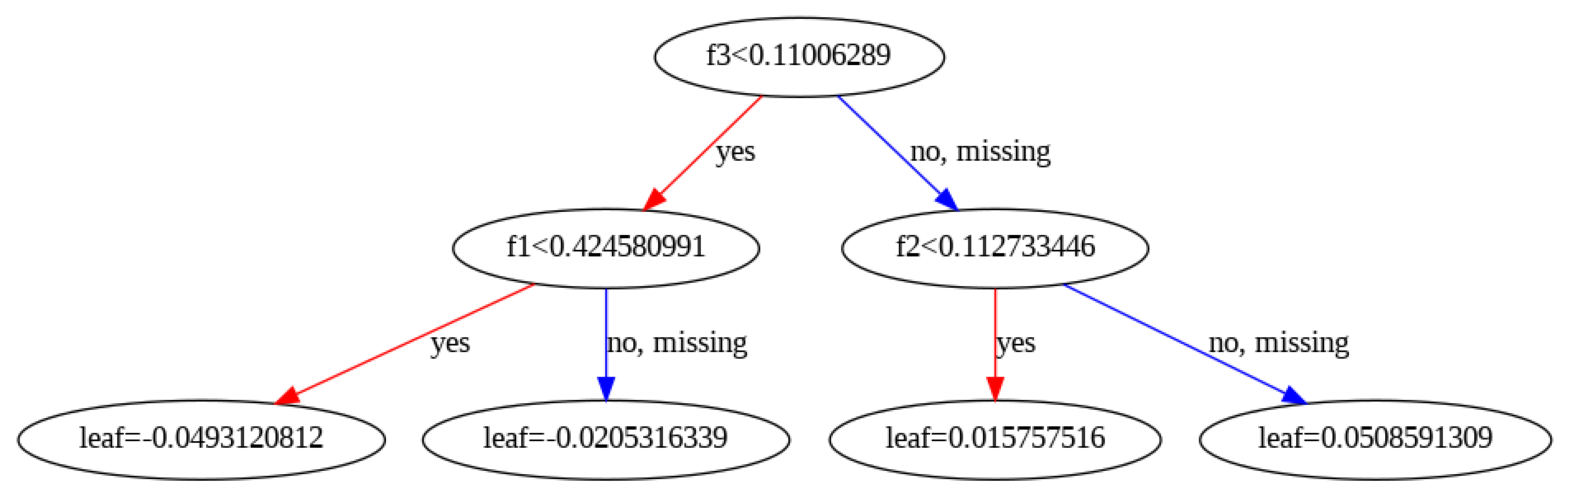

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9934866327170103

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920   
1  0.145530  0.571695  0.104924  0.118239  1.00  0.166667  0.428571  8.184235   
2  0.076923  0.493482  0.090492  0.103774  0.50  0.500000  0.571429  7.523481   
3  0.064449  0.472998  0.086587  0.100000  0.75  0.166667  0.714286  7.371489   
4  0.205821  0.633147  0.115789  0.133333  0.50  0.833333  0.285714  8.646466   

   Predictedprice  
0             7.0  
1             8.0  
2             8.0  
3             7.0  
4             9.0  
Mean Accuracy on test data: 96.30188343318709
Median Accuracy on test data: 96.46589550645346

Accuracy values for 10-fold Cross Validation:
 [97.95245112 98.33513749 98.26119918 98.01953801 97.47898    97.3092382
 97.51109023 97.55899896 97.78557667 97.9710634 ]

Fin

##Support Vector Machine (SVM) Regressor

In [ ]:

##This algorithm takes too long to load
'''
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
'''




SVR(C=50, gamma=0.01)
R2 Value: 0.9536485743668203

##### Model Validation and Accuracy Calculations ##########
      carat         x         y         z   cut     color   clarity     price  \
0  0.106029  0.524209  0.093888  0.113836  0.00  1.000000  0.714286  7.268920   
1  0.145530  0.571695  0.104924  0.118239  1.00  0.166667  0.428571  8.184235   
2  0.076923  0.493482  0.090492  0.103774  0.50  0.500000  0.571429  7.523481   
3  0.064449  0.472998  0.086587  0.100000  0.75  0.166667  0.714286  7.371489   
4  0.205821  0.633147  0.115789  0.133333  0.50  0.833333  0.285714  8.646466   

   Predictedprice  
0             7.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
Mean Accuracy on test data: 95.88342748368254
Median Accuracy on test data: 96.295239180489

Accuracy values for 10-fold Cross Validation:
 [98.15664325 98.23823451 98.23298703 98.02297292 98.04452797 97.76845727
 97.43111331 97.63600269 98.32367938 98.36712217]

Final Average Acc

## Step 21: Model Deployment

* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.
* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, I can choose any one of them.
* I am choosing XGboost as the final model it has the highest accuracy.
* In order to deploy the model we follow steps outlined next.
* Train/Build the model again using 100% data availible
* Save the model as a serialized file which can be stored anywhere.
* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction
* Choosing only the most important variables
* Its beneficial to keep lesser number of predictors for the model while deploying it in production.
* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features.
* I have selected to integrate the python functin with Tkinter


In [ ]:
import joblib
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

# Define X and y using all the availble data
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Train the XGBoost model using 100% of the available data
RegModel = XGBRegressor(max_depth=2,
                        learning_rate=0.1,
                        n_estimators=1000,
                        objective='reg:linear',
                        booster='gbtree')
XGB = RegModel.fit(X, y)

# Save the trained model as a serialized file
joblib.dump(XGB, 'xgboost_model.pkl')

print("Model trained and saved successfully!")

# Define a function for prediction
def predict_price(carat, x, y, z, cut, color, clarity):
  # Load the trained model
  loaded_model = joblib.load('xgboost_model.pkl')

  # Create a DataFrame with input features
  input_data = [[carat, x, y, z, cut, color, clarity]]
  input_df = pd.DataFrame(input_data, columns=Predictors)

  # Make predictions
  prediction = loaded_model.predict(input_df)

  return prediction

print('Prediction function created successfully!')

Model trained and saved successfully!
Prediction function created successfully!
